# Importing needed libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Load the dataset

In [4]:
data = pd.read_excel('C:/Users/Mohamed Ali/Downloads/e-office.xls')


# Understanding the dataset

In [5]:
data.shape

(142, 8)

In [6]:
data.columns

Index(['S/N', 'Year', 'Month', 'Institution Name', 'Files', 'Documents',
       'Category', 'Type'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               142 non-null    int64 
 1   Year              142 non-null    int64 
 2   Month             142 non-null    int64 
 3   Institution Name  142 non-null    object
 4   Files             142 non-null    int64 
 5   Documents         142 non-null    int64 
 6   Category          142 non-null    object
 7   Type              142 non-null    object
dtypes: int64(5), object(3)
memory usage: 9.0+ KB


In [8]:
data.describe()

,S/N,Year,Month,Files,Documents
count,142.000000,142.000000,142.000000,142.000000,142.000000
mean,71.619718,2019.500000,6.612676,955.295775,8418.302817
std,41.329627,1.457434,2.986610,1343.024483,17010.482193
min,1.000000,2017.000000,1.000000,0.000000,0.000000
25%,36.250000,2018.000000,5.000000,12.250000,6.000000
50%,71.500000,2020.000000,7.000000,502.500000,1528.000000
75%,106.750000,2021.000000,9.000000,1337.250000,10533.750000
max,144.000000,2021.000000,12.000000,9303.000000,113945.000000


In [9]:
data.head()

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
0,1,2017,5,"Ministry of Lands, Housing and Human Settlemen...",9303,18042,MDA,Ministry
1,2,2019,8,"Ministry of Health, Community, Development, Ge...",5513,31753,MDA,Ministry
2,3,2018,2,Ministry of Finance,5212,81238,MDA,Ministry
3,4,2019,5,Tanzania Building Agency (TBA),5113,35875,MDA,Agency
4,5,2017,12,"Ministry of Education, Science and Technology.",5112,15821,MDA,Ministry


In [10]:
data['Category'].value_counts()

MDA    117
LGA     25
Name: Category, dtype: int64

In [11]:
data['Type'].value_counts()

Institution    50
Ministry       24
RAS            16
Agency         15
Authority      15
Office          8
Zone            7
Department      2
University      2
DAS             2
Hospital        1
Name: Type, dtype: int64

# PHASE 1

# 1. Number of Users Joined per year

In [12]:
x = data.groupby('Year')['Institution Name'].count()
x

Year
2017    25
2018    14
2019    11
2020    49
2021    43
Name: Institution Name, dtype: int64

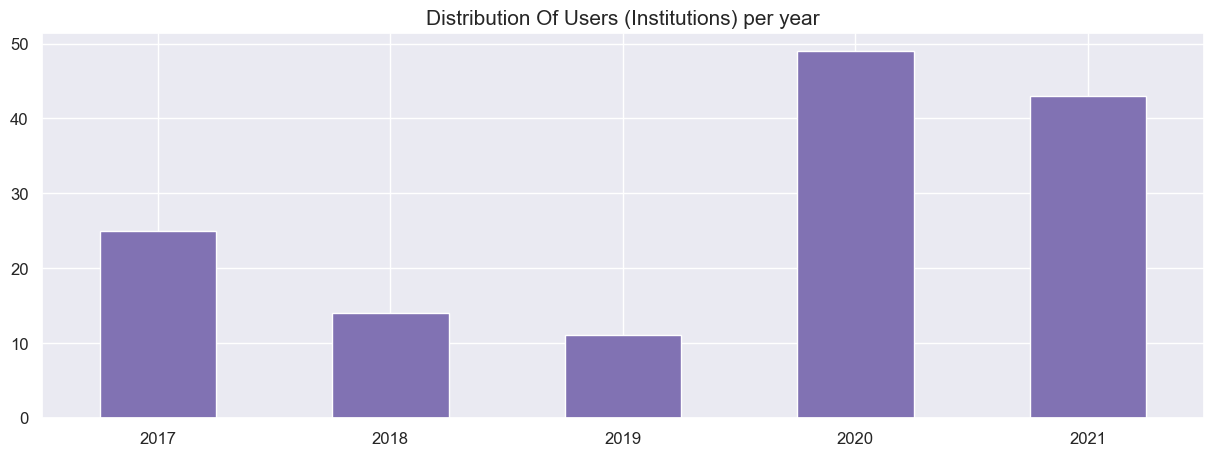

In [17]:
#x.reset_index(inplace=True)
x.plot(kind='bar', color='m', figsize=(15,5))
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.xticks(rotation='horizontal')
plt.title('Distribution Of Users (Institutions) per year', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Users per year.pdf')
plt.show()

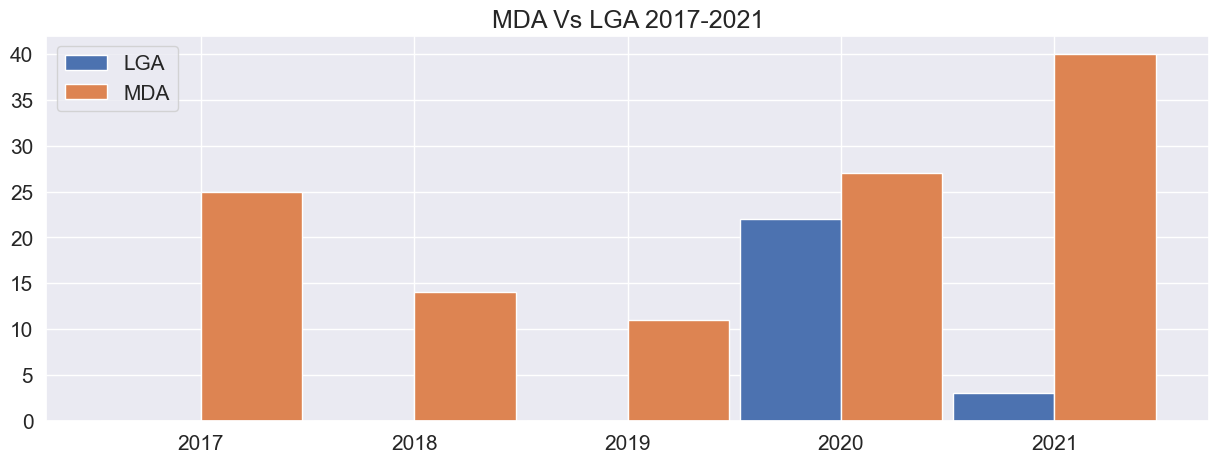

In [20]:
data.groupby('Year')['Category'].value_counts().unstack().plot.bar(width=0.95,figsize=(15,5))
plt.xlabel('',fontsize=33)
plt.ylabel('',fontsize=33)
plt.title('MDA Vs LGA 2017-2021', fontsize=18)
plt.xticks(rotation='horizontal',fontsize = 15)
plt.yticks(rotation='horizontal',fontsize = 15)
plt.legend(fontsize=15)
#plt.savefig('MDA Vs LGA.pdf')
plt.show()

# Document analysis


In [22]:
data['Documents'].max()

113945

In [25]:
df_doc.sum()

1195399

In [26]:
df_doc = data.groupby('Year')['Documents'].sum()
df_doc

Year
2017    588666
2018    177391
2019    145825
2020    258077
2021     25440
Name: Documents, dtype: int64

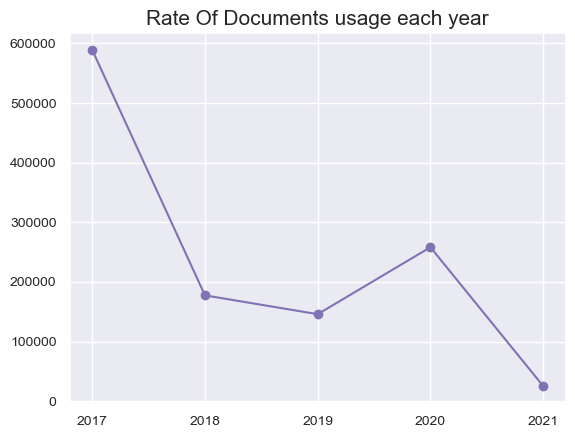

In [28]:
df_doc.plot(kind='line',xticks=(2017,2018,2019,2020,2021),marker='o',color='m')
plt.title('Rate Of Documents usage each year',fontsize=15)
plt.ylabel('',fontsize=12)
plt.xlabel('',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

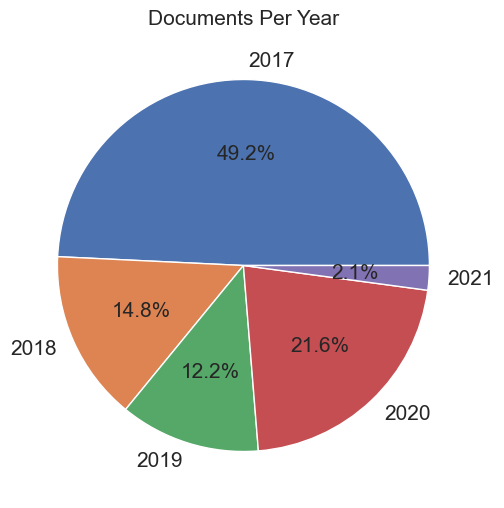

In [31]:
df_doc.plot.pie(subplots=True,legend=False,figsize=(6,8),autopct="%.1f%%",fontsize=15)
plt.title('Documents Per Year', loc='center',fontsize=15)
plt.ylabel('')
#plt.savefig('pie.png',  bbox_inches='tight')
plt.show()

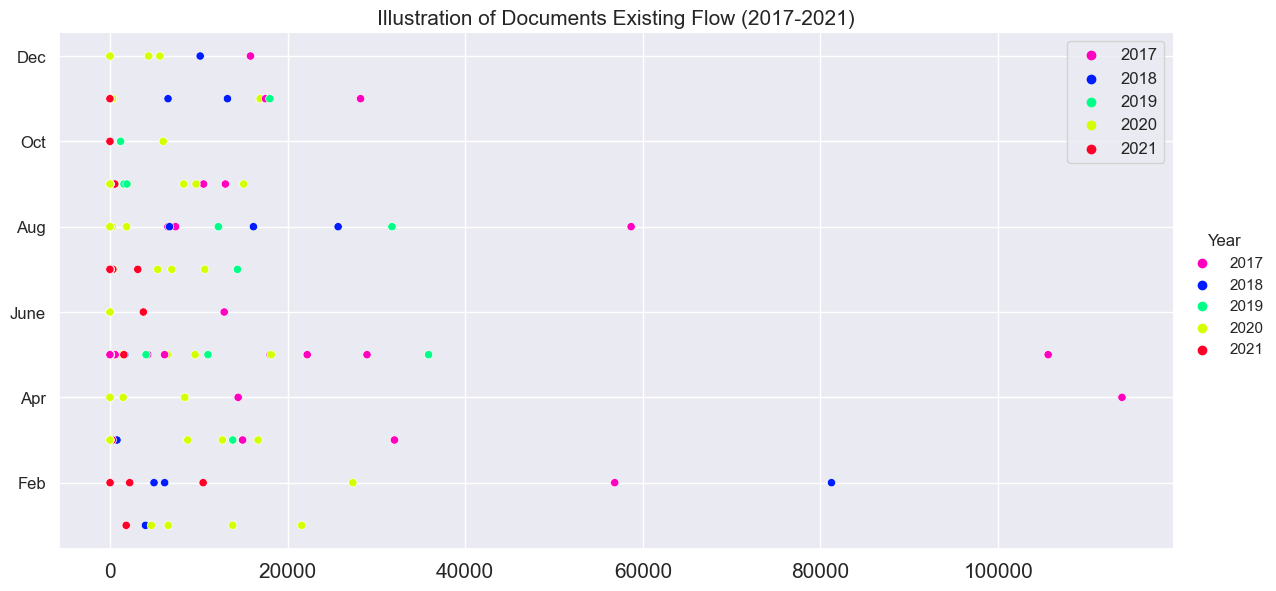

In [35]:
sns.relplot(x='Documents',y='Month', hue='Year', data=data,kind='scatter', palette='gist_rainbow_r', aspect=2, height=6)
plt.xlabel('',fontsize=25)
plt.ylabel('',fontsize=25)
plt.title('Illustration of Documents Existing Flow (2017-2021)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([2,4,6,8,10,12],["Feb","Apr","June","Aug","Oct","Dec"])
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('doc flow.png')
plt.show()

In [29]:
D_Gen = data.sort_values(by='Documents',ascending=False).head(10)
D_Gen

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
9,10,2017,4,Ministry of Foreign Affairs and East African C...,2740,113945,MDA,Ministry
20,21,2017,5,Ministry in the President’s Office – Public Se...,1831,105634,MDA,Ministry
2,3,2018,2,Ministry of Finance,5212,81238,MDA,Ministry
12,13,2017,8,Ministry in the President's Office Regional Ad...,2613,58680,MDA,Ministry
34,35,2017,2,Ministry of Works and Transport (TRANSPORT),1384,56833,MDA,Ministry
3,4,2019,5,Tanzania Building Agency (TBA),5113,35875,MDA,Agency
53,54,2017,3,e-Government Authority (eGA),900,32034,MDA,Authority
1,2,2019,8,"Ministry of Health, Community, Development, Ge...",5513,31753,MDA,Ministry
62,63,2017,5,Dar Rapid Transit (DART),743,28944,MDA,Institution
35,36,2017,11,Government Procurement Services Agency (GPSA),1350,28218,MDA,Agency


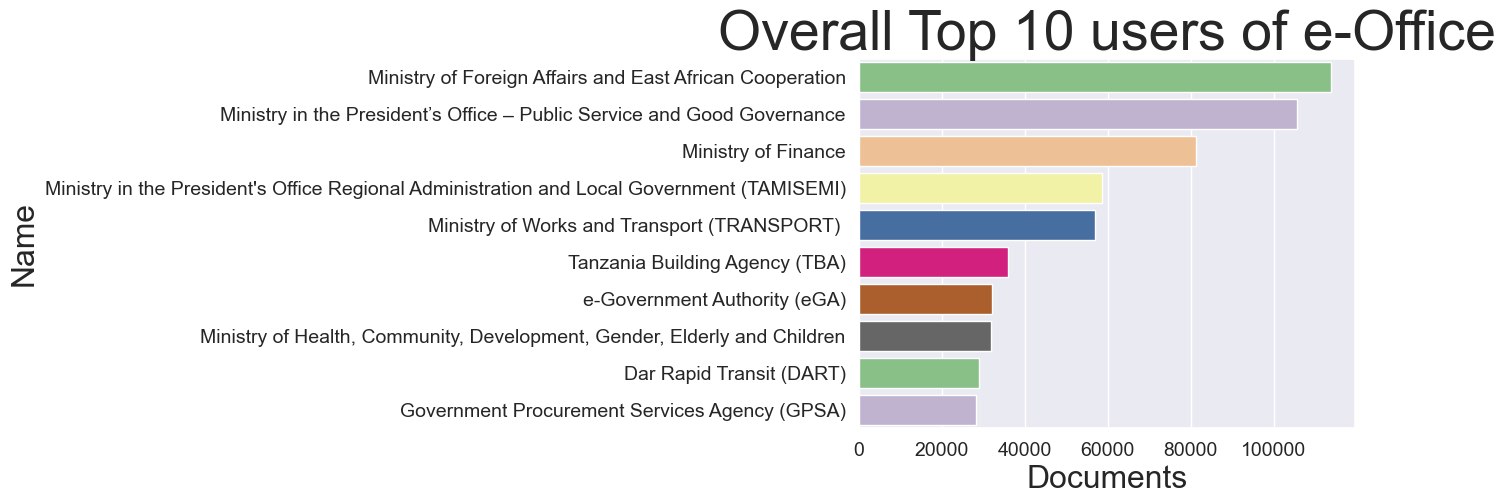

In [30]:
sns.barplot(data=D_Gen,y='Institution Name',x='Documents',palette='Accent')
plt.title('Overall Top 10 users of e-Office',fontsize=40)
plt.ylabel('Name',fontsize=23)
plt.xlabel('Documents',fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Top ten.pdf', bbox_inches='tight')
plt.show()

In [33]:
data[data['Documents'].between(0,35000)].sort_values(by='Documents', ascending=False).head(30)

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
53,54,2017,3,e-Government Authority (eGA),900,32034,MDA,Authority
1,2,2019,8,"Ministry of Health, Community, Development, Ge...",5513,31753,MDA,Ministry
62,63,2017,5,Dar Rapid Transit (DART),743,28944,MDA,Institution
35,36,2017,11,Government Procurement Services Agency (GPSA),1350,28218,MDA,Agency
18,19,2020,2,National Insurance Corporation (NIC),1870,27349,MDA,Institution
14,15,2018,8,Ministry of Natural Resources and Tourism,2298,25694,MDA,Ministry
29,30,2017,5,Prime Minister's Office,1454,22212,MDA,Office
49,50,2020,1,Tanzania Railways Corporation (TRC),941,21584,MDA,Institution
27,28,2020,5,Kilimanjaro Regional Administrative Secretary,1569,18168,LGA,RAS
0,1,2017,5,"Ministry of Lands, Housing and Human Settlemen...",9303,18042,MDA,Ministry


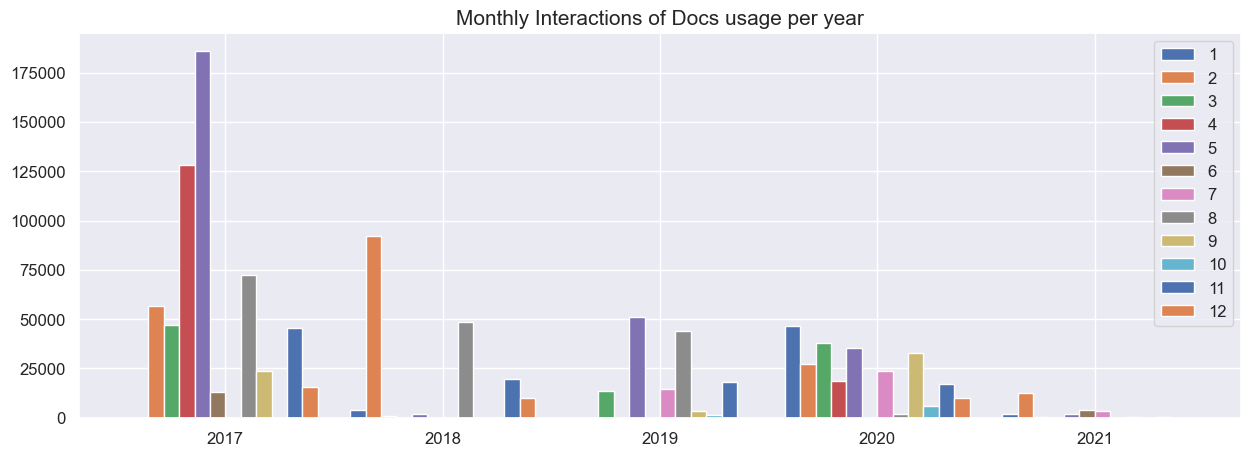

In [36]:
data.groupby(['Year','Month'])['Documents'].sum().unstack().plot.bar(width=0.85,figsize=(15,5))
plt.xlabel('',fontsize=23)
plt.ylabel('',fontsize=23)
plt.title('Monthly Interactions of Docs usage per year', fontsize=15)
plt.legend(fontsize = 12)
plt.xticks(rotation='horizontal',fontsize = 12)
plt.yticks(rotation='horizontal',fontsize = 12)
plt.legend(fontsize=12)
#plt.savefig('Monthly.png',  bbox_inches='tight')
plt.show()

# MINISTRIES

In [40]:
M_T = data[data['Institution Name'].str.contains('Ministry')].sort_values(by='Documents', ascending=False)
M_T

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
9,10,2017,4,Ministry of Foreign Affairs and East African C...,2740,113945,MDA,Ministry
20,21,2017,5,Ministry in the President’s Office – Public Se...,1831,105634,MDA,Ministry
2,3,2018,2,Ministry of Finance,5212,81238,MDA,Ministry
12,13,2017,8,Ministry in the President's Office Regional Ad...,2613,58680,MDA,Ministry
34,35,2017,2,Ministry of Works and Transport (TRANSPORT),1384,56833,MDA,Ministry
1,2,2019,8,"Ministry of Health, Community, Development, Ge...",5513,31753,MDA,Ministry
14,15,2018,8,Ministry of Natural Resources and Tourism,2298,25694,MDA,Ministry
0,1,2017,5,"Ministry of Lands, Housing and Human Settlemen...",9303,18042,MDA,Ministry
21,22,2020,3,Ministry of Livestock and Fisheries,1809,16678,MDA,Ministry
28,29,2018,8,"Ministry in the Prime Minister's Office Labor,...",1549,16158,MDA,Ministry


In [41]:
M_10 = data[data['Institution Name'].str.contains('Ministry')].sort_values(by='Documents', ascending=False).head(10)
M_10

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
9,10,2017,4,Ministry of Foreign Affairs and East African C...,2740,113945,MDA,Ministry
20,21,2017,5,Ministry in the President’s Office – Public Se...,1831,105634,MDA,Ministry
2,3,2018,2,Ministry of Finance,5212,81238,MDA,Ministry
12,13,2017,8,Ministry in the President's Office Regional Ad...,2613,58680,MDA,Ministry
34,35,2017,2,Ministry of Works and Transport (TRANSPORT),1384,56833,MDA,Ministry
1,2,2019,8,"Ministry of Health, Community, Development, Ge...",5513,31753,MDA,Ministry
14,15,2018,8,Ministry of Natural Resources and Tourism,2298,25694,MDA,Ministry
0,1,2017,5,"Ministry of Lands, Housing and Human Settlemen...",9303,18042,MDA,Ministry
21,22,2020,3,Ministry of Livestock and Fisheries,1809,16678,MDA,Ministry
28,29,2018,8,"Ministry in the Prime Minister's Office Labor,...",1549,16158,MDA,Ministry


In [42]:
M_T.groupby('Year')['Documents'].sum()

Year
2017    437318
2018    135008
2019     31753
2020     16678
2021     10494
Name: Documents, dtype: int64

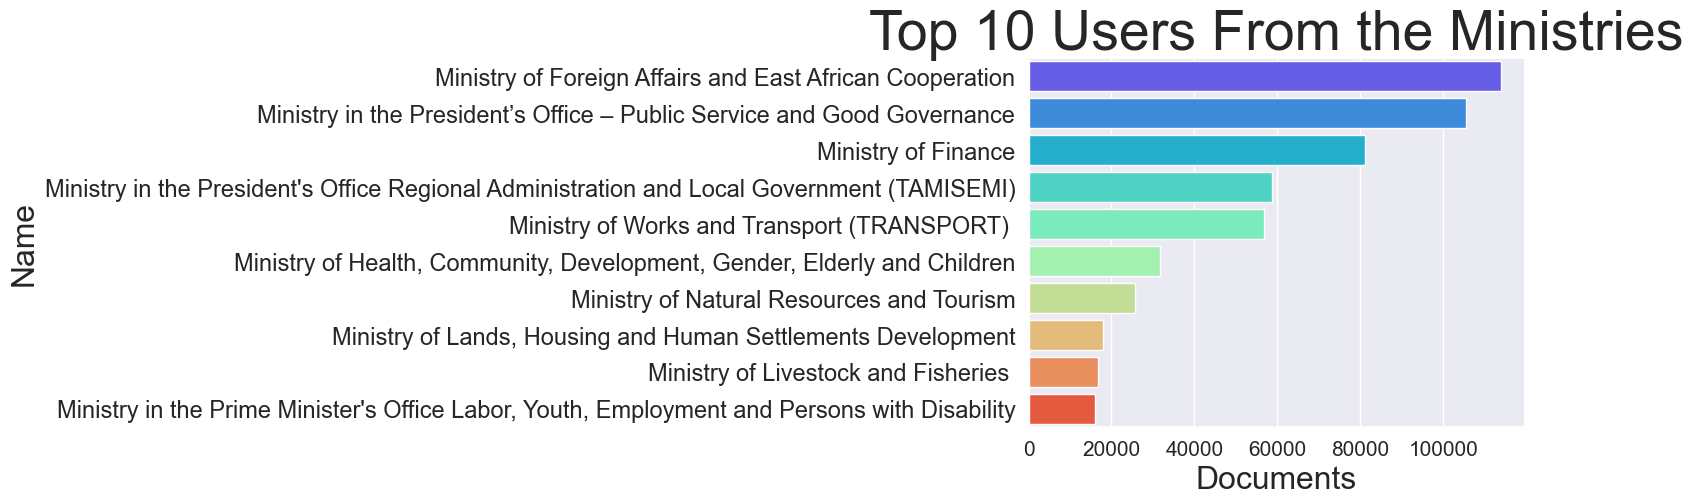

In [43]:
sns.barplot(data=M_10,y='Institution Name',x='Documents',palette='rainbow')
plt.title('Top 10 Users From the Ministries',fontsize=40)
plt.ylabel('Name',fontsize=23)
plt.xlabel('Documents',fontsize=23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=17)
#plt.savefig('Ministries.png',  bbox_inches='tight')
plt.show()

In [44]:
M_T.groupby('Year')['Institution Name'].value_counts()

Year  Institution Name                                                                            
2017  Ministry in the President's Office Regional Administration and Local Government (TAMISEMI)      1
      Ministry in the President’s Office – Public Service and Good Governance                         1
      Ministry in the President’s Office – Records and Archives Management Department                 1
      Ministry of Agriculture                                                                         1
      Ministry of Constitutional and Legal Affairs (MoCLA)                                            1
      Ministry of Defense and National Service                                                        1
      Ministry of Education, Science and Technology.                                                  1
      Ministry of Foreign Affairs and East African Cooperation                                        1
      Ministry of Industry, Trade and Investment                     

In [45]:
M_T_G = M_T.groupby('Year')['Institution Name'].count()
M_T_G

Year
2017    15
2018     6
2019     1
2020     1
2021     1
Name: Institution Name, dtype: int64

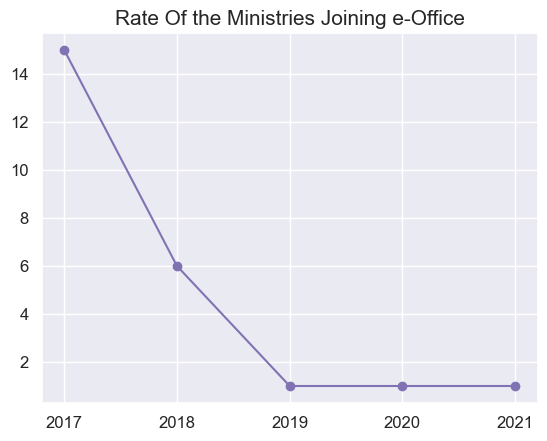

In [46]:
M_T_G.plot(kind='line',xticks=(2017,2018,2019,2020,2021),marker='o',color='m')
plt.title('Rate Of the Ministries Joining e-Office',fontsize=15)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#fig.savefig('RateMinis.pdf',  bbox_inches='tight')\n",
plt.show()

 # AUTHORITIES

In [47]:
A_T = data[data['Institution Name'].str.contains('Authority')].sort_values(by='Documents', ascending=False)
A_T

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
53,54,2017,3,e-Government Authority (eGA),900,32034,MDA,Authority
6,7,2020,11,Tanzania Civil Aviation Authority (TCAA),3520,16912,MDA,Authority
25,26,2019,7,Government Chemist Laboratory Authority (GCLA),1629,14354,MDA,Authority
11,12,2020,1,Occupational Safety and Health Authority (OSHA),2625,13819,MDA,Authority
61,62,2020,3,Public Procurement Regulatory Authority (PPRA),753,12661,MDA,Authority
8,9,2020,9,Tanzania Insurance Regulatory Authority (TIRA),3212,8308,MDA,Authority
39,40,2020,7,Tanzania Education Authority (TEA),1252,6965,MDA,Authority
24,25,2018,11,Tanzania Medicines and Medical Devices Authori...,1639,6542,MDA,Authority
16,17,2021,7,National Identification Authority (NIDA),2035,3137,MDA,Authority
63,64,2020,8,Tanga Urban Water Supply and Sanitation Author...,734,1877,MDA,Authority


In [48]:
A_10 = data[data['Institution Name'].str.contains('Authority')].sort_values(by='Documents', ascending=False).head(10)
A_10

,S/N,Year,Month,Institution Name,Files,Documents,Category,Type
53,54,2017,3,e-Government Authority (eGA),900,32034,MDA,Authority
6,7,2020,11,Tanzania Civil Aviation Authority (TCAA),3520,16912,MDA,Authority
25,26,2019,7,Government Chemist Laboratory Authority (GCLA),1629,14354,MDA,Authority
11,12,2020,1,Occupational Safety and Health Authority (OSHA),2625,13819,MDA,Authority
61,62,2020,3,Public Procurement Regulatory Authority (PPRA),753,12661,MDA,Authority
8,9,2020,9,Tanzania Insurance Regulatory Authority (TIRA),3212,8308,MDA,Authority
39,40,2020,7,Tanzania Education Authority (TEA),1252,6965,MDA,Authority
24,25,2018,11,Tanzania Medicines and Medical Devices Authori...,1639,6542,MDA,Authority
16,17,2021,7,National Identification Authority (NIDA),2035,3137,MDA,Authority
63,64,2020,8,Tanga Urban Water Supply and Sanitation Author...,734,1877,MDA,Authority


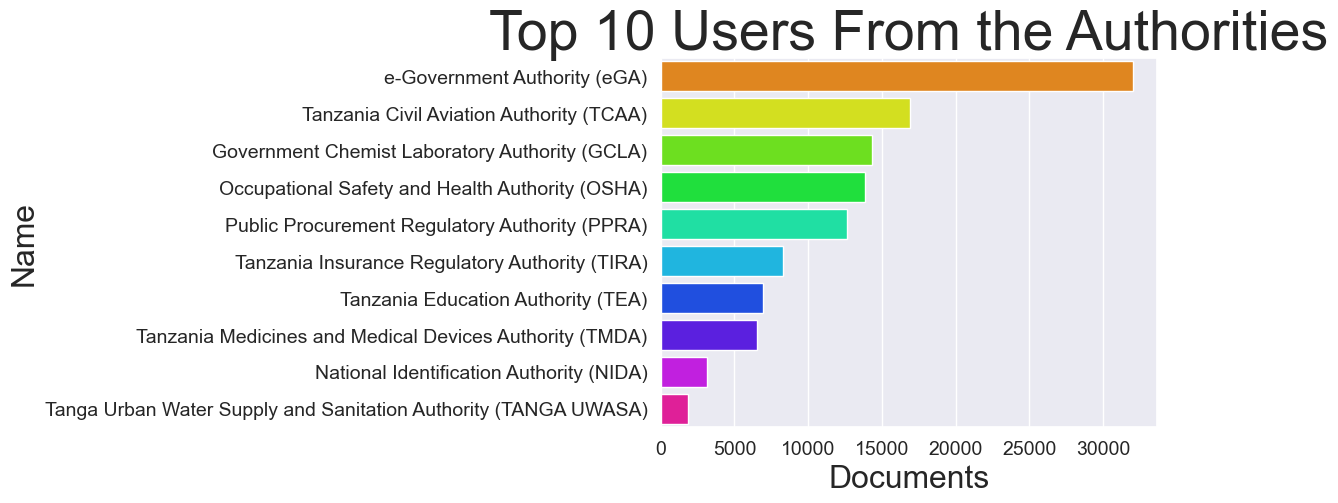

In [49]:
sns.barplot(data=A_10,y='Institution Name',x='Documents',palette='hsv')
plt.title('Top 10 Users From the Authorities',fontsize=40)
plt.ylabel('Name',fontsize=23)
plt.xlabel('Documents',fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Authorities.png', bbox_inches='tight')\n",
plt.show()

In [50]:
A = A_T.groupby('Year')['Institution Name'].count()  #.value_counts()
A

Year
2017    1
2018    1
2019    1
2020    7
2021    5
Name: Institution Name, dtype: int64

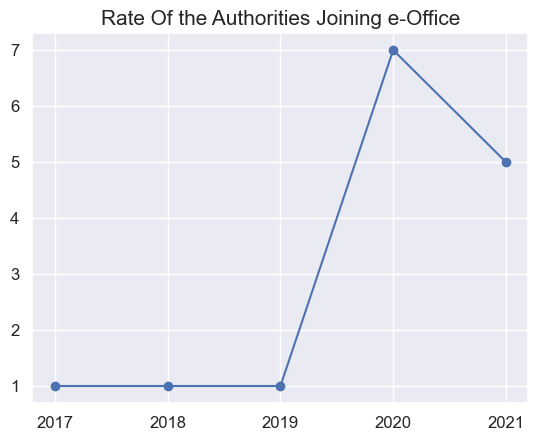

In [51]:
A.plot(kind='line',xticks=(2017,2018,2019,2020,2021),marker='o')
plt.title('Rate Of the Authorities Joining e-Office',fontsize=15)
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('RateAuthor.png', bbox_inches='tight')\n",
plt.show()